# **Install required packages**

In [ ]:
!pip install numpy
!pip install plotly
!pip install requests
!pip install PyPDF2
!pip install leap_ec
!pip install torch
!pip install scikit-learn

# **Imports**


In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import torch
import sklearn
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import plotly.graph_objects as go
import plotly.express as px

# **URL of the dataset**
The final preprocessed dataset is in the "final_dataset" folder of my github repository

In [44]:
#2017
url_dataset_2017 = 'https://raw.githubusercontent.com/simoncraf/tfg/main/final_dataset/df_2017.csv'
df = pd.read_csv(url_dataset_2017)

In [45]:
df = df.drop(columns = 'gender')
df

,age,married,education,value_main_house,future_expenses,%_spend_future_win,risk,tot_amm_year_retirement_plans,tot_value_retirement_plans,tot_income_month,tot_loans_rest,tot_amm_acc,port_inv_val,ann_inv_income,monthly_expenses
0,73.0,6.0,2.0,150000.0,3.0,0.0,4.0,360.0,15000.0,637.0,0.0,0.0,0.0,0.0,487.0
1,74.0,2.0,4.0,300000.0,3.0,0.0,4.0,360.0,15000.0,1076.0,0.0,30000.0,0.0,0.0,3000.0
2,74.0,6.0,4.0,300000.0,3.0,99.0,4.0,360.0,15000.0,1000.0,0.0,5000.0,160597.0,0.0,600.0
3,65.0,2.0,11.0,124339.0,2.0,0.0,4.0,360.0,15000.0,2012.0,0.0,400.0,10000.0,250.0,1700.0
4,76.0,2.0,2.0,311529.0,3.0,100.0,4.0,17500.0,150000.0,16667.0,0.0,1000000.0,2000000.0,500.0,10000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6408,45.0,4.0,11.0,84000.0,3.0,70.0,3.0,250.0,1701.0,2300.0,31539.0,3000.0,160597.0,0.0,1222.0
6409,49.0,2.0,11.0,1000000.0,1.0,100.0,4.0,8000.0,90000.0,7422.0,0.0,70000.0,600000.0,4000.0,3000.0
6410,47.0,2.0,11.0,600000.0,3.0,0.0,3.0,5300.0,40000.0,41667.0,250000.0,100000.0,800.0,0.0,4500.0
6411,73.0,2.0,10.0,150000.0,3.0,50.0,4.0,360.0,15000.0,1840.0,8000.0,4200.0,4.0,0.0,1014.0


# **Categorization**

In [46]:
df.describe()

,age,married,education,value_main_house,future_expenses,%_spend_future_win,risk,tot_amm_year_retirement_plans,tot_value_retirement_plans,tot_income_month,tot_loans_rest,tot_amm_acc,port_inv_val,ann_inv_income,monthly_expenses
count,6413.000000,6413.000000,6413.000000,6.413000e+03,6413.000000,6413.000000,6413.000000,6413.000000,6413.000000,6413.000000,6.413000e+03,6.413000e+03,6.413000e+03,6.413000e+03,6413.000000
mean,59.854046,2.606424,6.689069,2.461210e+05,2.110245,43.075472,3.717449,658.999634,22887.300154,1715.329955,3.389665e+04,4.455810e+04,4.333574e+05,9.034366e+03,1851.200073
std,14.870828,1.561917,3.680257,3.829487e+05,0.932957,39.400533,0.554854,1584.558091,42700.440096,2935.584894,1.710698e+05,2.568807e+05,6.968526e+06,2.222844e+05,1937.142293
min,19.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000
25%,49.000000,2.000000,3.000000,6.000000e+04,1.000000,0.000000,4.000000,360.000000,15000.000000,564.000000,0.000000e+00,1.500000e+03,0.000000e+00,0.000000e+00,900.000000
50%,60.000000,2.000000,6.000000,1.500000e+05,2.000000,50.000000,4.000000,360.000000,15000.000000,1300.000000,0.000000e+00,8.000000e+03,0.000000e+00,0.000000e+00,1360.000000
75%,72.000000,2.000000,11.000000,3.000000e+05,3.000000,100.000000,4.000000,360.000000,15000.000000,2293.000000,1.531800e+04,3.000000e+04,3.700000e+04,0.000000e+00,2100.000000
max,85.000000,6.000000,14.000000,7.000000e+06,3.000000,100.000000,4.000000,64000.000000,1000000.000000,90000.000000,6.689426e+06,1.500000e+07,3.760000e+08,1.260000e+07,36442.000000


In [47]:
def plot_distribution(col):
    
    field = df[col]
    min_field = int(field.min())
    max_field = int(field.max())
    range_field = list(range(min_field, max_field))
    
    field_counts = field.value_counts().sort_values(axis = 'index')
    field_counts = pd.DataFrame(field_counts)
    field_counts = field_counts.reset_index()
    field_counts['appearances'] = field_counts[col]
    field_counts[col] = field_counts['index']
    field_counts.drop(labels = 'index', axis=1, inplace=True)
    field_counts = field_counts.sort_values(by=[col])
    
    fig = plt.figure(figsize = (10,5))
    ax = fig.add_axes([0,0,1,1])
    ax.bar(field_counts[col],field_counts['appearances'])
    plt.show()

    print('MAX: \n',field_counts.max(),'\n')
    print('MIN: \n',field_counts.min(),'\n')

# *Age*

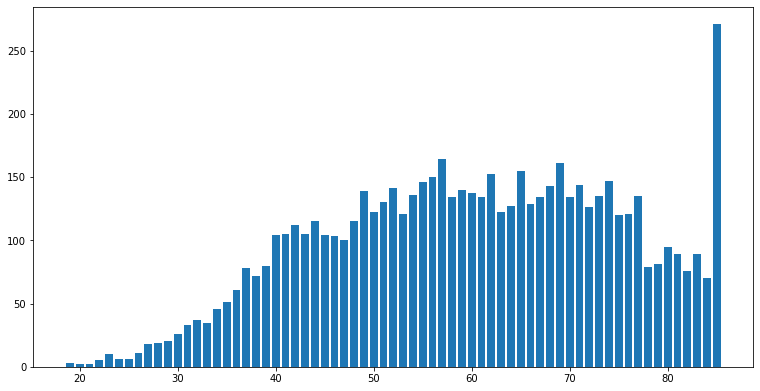

MAX: 
 age             85.0
appearances    271.0
dtype: float64 

MIN: 
 age            19.0
appearances     2.0
dtype: float64 



In [48]:
plot_distribution('age')

In [49]:
df['age'].loc[df['age'] < 25] = 1 
df['age'].loc[(df['age'] >= 25) & (df['age'] < 35)] = 2
df['age'].loc[(df['age'] >= 35) & (df['age'] < 45)] = 3
df['age'].loc[(df['age'] >= 45) & (df['age'] < 55)] = 4
df['age'].loc[(df['age'] >= 55) & (df['age'] < 65)] = 5
df['age'].loc[(df['age'] >= 65) & (df['age'] < 75)] = 6
df['age'].loc[df['age'] >= 75] = 7

In [50]:
df['age'].describe()

count    6413.000000
mean        5.002807
std         1.465019
min         1.000000
25%         4.000000
50%         5.000000
75%         6.000000
max         7.000000
Name: age, dtype: float64

# *Value Main House*

In [51]:
df['value_main_house'].loc[df['value_main_house'] == 0] = 0
df['value_main_house'].loc[(df['value_main_house'] > 0) & (df['value_main_house'] < 50000)] = 1
df['value_main_house'].loc[(df['value_main_house'] >= 50000) & (df['value_main_house'] < 100000)] = 2
df['value_main_house'].loc[(df['value_main_house'] >= 100000) & (df['value_main_house'] < 200000)] = 3
df['value_main_house'].loc[(df['value_main_house'] >= 200000) & (df['value_main_house'] < 300000)] = 4
df['value_main_house'].loc[(df['value_main_house'] >= 300000) & (df['value_main_house'] < 500000)] = 5
df['value_main_house'].loc[df['value_main_house'] >= 500000] = 6

In [52]:
df['value_main_house'].describe()

count    6413.000000
mean        3.018088
std         1.922058
min         0.000000
25%         2.000000
50%         3.000000
75%         5.000000
max         6.000000
Name: value_main_house, dtype: float64

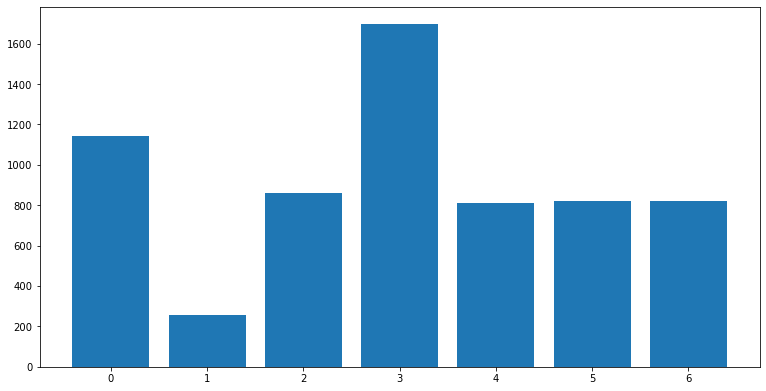

MAX: 
 value_main_house       6.0
appearances         1698.0
dtype: float64 

MIN: 
 value_main_house      0.0
appearances         255.0
dtype: float64 



In [53]:
plot_distribution('value_main_house')

# *% Spend Future Win* 

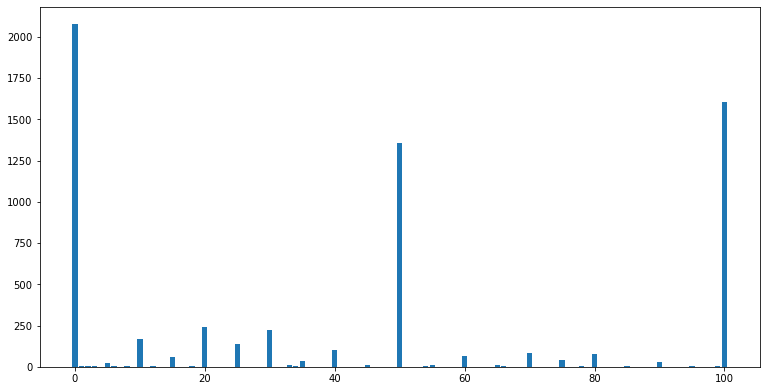

MAX: 
 %_spend_future_win     100.0
appearances           2078.0
dtype: float64 

MIN: 
 %_spend_future_win    0.0
appearances           1.0
dtype: float64 



In [54]:
plot_distribution('%_spend_future_win')

In [55]:
df['%_spend_future_win'].loc[df['%_spend_future_win'] <= 1] = 1 
df['%_spend_future_win'].loc[(df['%_spend_future_win'] > 1) & (df['%_spend_future_win'] < 25)] = 2
df['%_spend_future_win'].loc[(df['%_spend_future_win'] >= 25) & (df['%_spend_future_win'] < 50)] = 3
df['%_spend_future_win'].loc[(df['%_spend_future_win'] >= 50) & (df['%_spend_future_win'] < 75)] = 4
df['%_spend_future_win'].loc[df['%_spend_future_win'] >= 75] = 5

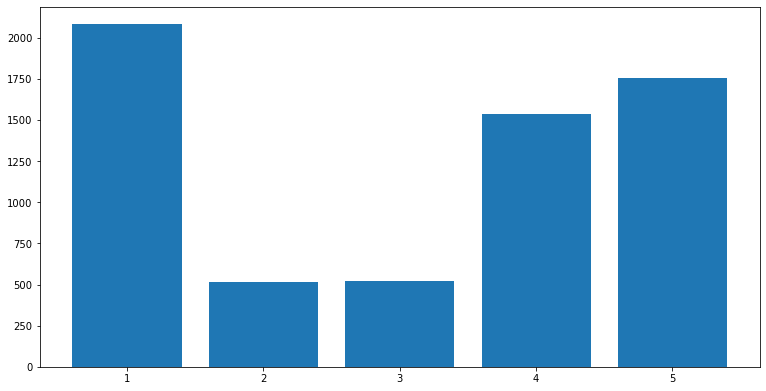

MAX: 
 %_spend_future_win       5.0
appearances           2084.0
dtype: float64 

MIN: 
 %_spend_future_win      1.0
appearances           518.0
dtype: float64 



In [56]:
plot_distribution('%_spend_future_win')

# *Annual Contribution to Retirement Plans*

In [57]:
df['tot_amm_year_retirement_plans'].describe()

count     6413.000000
mean       658.999634
std       1584.558091
min          0.000000
25%        360.000000
50%        360.000000
75%        360.000000
max      64000.000000
Name: tot_amm_year_retirement_plans, dtype: float64

In [58]:
df['tot_amm_year_retirement_plans'].loc[df['tot_amm_year_retirement_plans'] == 0] = 0
df['tot_amm_year_retirement_plans'].loc[(df['tot_amm_year_retirement_plans'] > 0) & (df['tot_amm_year_retirement_plans'] < 500)] = 1
df['tot_amm_year_retirement_plans'].loc[(df['tot_amm_year_retirement_plans'] >= 500) & (df['tot_amm_year_retirement_plans'] < 1000)] = 2
df['tot_amm_year_retirement_plans'].loc[(df['tot_amm_year_retirement_plans'] >= 1000) & (df['tot_amm_year_retirement_plans'] < 2000)] = 3
df['tot_amm_year_retirement_plans'].loc[(df['tot_amm_year_retirement_plans'] >= 2000) & (df['tot_amm_year_retirement_plans'] < 3000)] = 4
df['tot_amm_year_retirement_plans'].loc[df['tot_amm_year_retirement_plans'] >= 3000] = 5

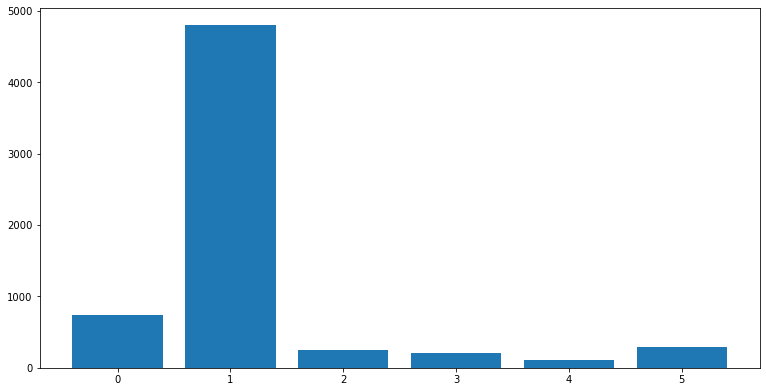

MAX: 
 tot_amm_year_retirement_plans       5.0
appearances                      4803.0
dtype: float64 

MIN: 
 tot_amm_year_retirement_plans      0.0
appearances                      114.0
dtype: float64 



In [59]:
plot_distribution('tot_amm_year_retirement_plans')

# *Total value retirement plans*

In [60]:
df['tot_value_retirement_plans'].describe()

count       6413.000000
mean       22887.300154
std        42700.440096
min           20.000000
25%        15000.000000
50%        15000.000000
75%        15000.000000
max      1000000.000000
Name: tot_value_retirement_plans, dtype: float64

In [61]:
df['tot_value_retirement_plans'].loc[df['tot_value_retirement_plans'] == 0] = 0
df['tot_value_retirement_plans'].loc[(df['tot_value_retirement_plans'] > 0) & (df['tot_value_retirement_plans'] < 5000)] = 1
df['tot_value_retirement_plans'].loc[(df['tot_value_retirement_plans'] >= 5000) & (df['tot_value_retirement_plans'] < 15000)] = 2
df['tot_value_retirement_plans'].loc[(df['tot_value_retirement_plans'] >= 15000) & (df['tot_value_retirement_plans'] < 30000)] = 3
df['tot_value_retirement_plans'].loc[(df['tot_value_retirement_plans'] >= 30000) & (df['tot_value_retirement_plans'] < 50000)] = 4
df['tot_value_retirement_plans'].loc[(df['tot_value_retirement_plans'] >= 50000) & (df['tot_value_retirement_plans'] < 150000)] = 5
df['tot_value_retirement_plans'].loc[df['tot_value_retirement_plans'] >= 150000] = 6

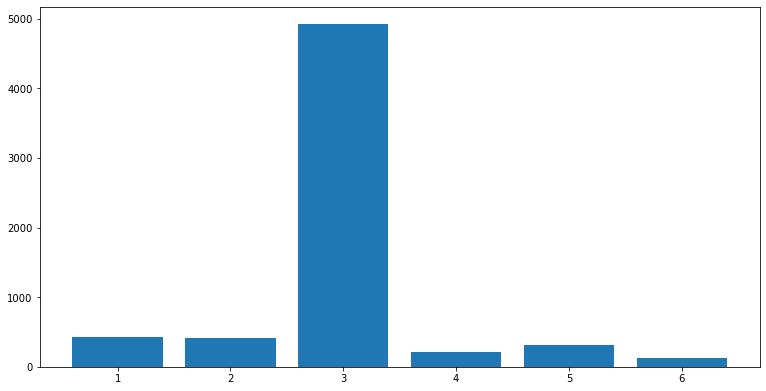

MAX: 
 tot_value_retirement_plans       6.0
appearances                   4924.0
dtype: float64 

MIN: 
 tot_value_retirement_plans      1.0
appearances                   131.0
dtype: float64 



In [62]:
plot_distribution('tot_value_retirement_plans')

# *tot_income_month*

In [63]:
df['tot_income_month'].describe()

count     6413.000000
mean      1715.329955
std       2935.584894
min          0.000000
25%        564.000000
50%       1300.000000
75%       2293.000000
max      90000.000000
Name: tot_income_month, dtype: float64

In [64]:
df['tot_income_month'].loc[df['tot_income_month'] == 0] = 0
df['tot_income_month'].loc[(df['tot_income_month'] > 0) & (df['tot_income_month'] < 500)] = 1
df['tot_income_month'].loc[(df['tot_income_month'] >= 500) & (df['tot_income_month'] < 1000)] = 2
df['tot_income_month'].loc[(df['tot_income_month'] >= 1000) & (df['tot_income_month'] <= 1500)] = 3
df['tot_income_month'].loc[(df['tot_income_month'] > 1500) & (df['tot_income_month'] < 2000)] = 4
df['tot_income_month'].loc[(df['tot_income_month'] >= 2000) & (df['tot_income_month'] < 3000)] = 5
df['tot_income_month'].loc[df['tot_income_month'] >= 3000] = 6

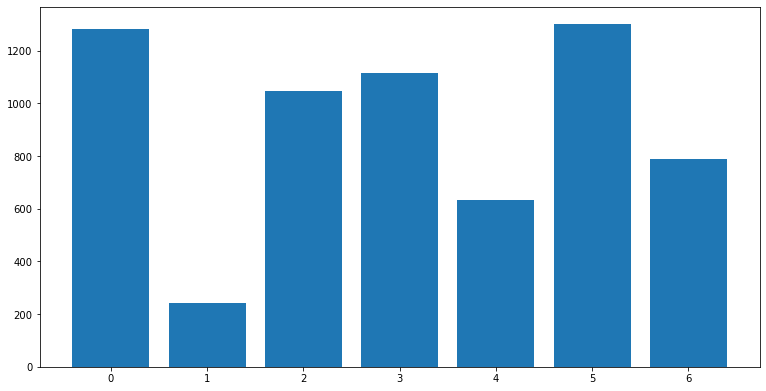

MAX: 
 tot_income_month       6.0
appearances         1302.0
dtype: float64 

MIN: 
 tot_income_month      0.0
appearances         241.0
dtype: float64 



In [65]:
plot_distribution('tot_income_month')

# *tot_loans_rest*

In [66]:
df['tot_loans_rest'].describe()

count    6.413000e+03
mean     3.389665e+04
std      1.710698e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.531800e+04
max      6.689426e+06
Name: tot_loans_rest, dtype: float64

In [67]:
df['tot_loans_rest'].loc[df['tot_loans_rest'] == 0] = 0
df['tot_loans_rest'].loc[(df['tot_loans_rest'] > 0) & (df['tot_loans_rest'] < 50000)] = 1
df['tot_loans_rest'].loc[(df['tot_loans_rest'] >= 50000) & (df['tot_loans_rest'] < 100000)] = 2
df['tot_loans_rest'].loc[(df['tot_loans_rest'] >= 100000) & (df['tot_loans_rest'] < 200000)] = 3
df['tot_loans_rest'].loc[df['tot_loans_rest'] >= 200000] = 4

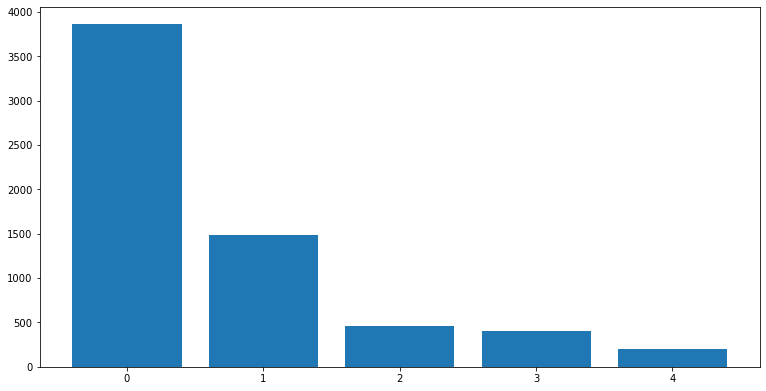

MAX: 
 tot_loans_rest       4.0
appearances       3864.0
dtype: float64 

MIN: 
 tot_loans_rest      0.0
appearances       196.0
dtype: float64 



In [68]:
plot_distribution('tot_loans_rest')

In [69]:
df['tot_amm_acc'].describe()

count    6.413000e+03
mean     4.455810e+04
std      2.568807e+05
min      0.000000e+00
25%      1.500000e+03
50%      8.000000e+03
75%      3.000000e+04
max      1.500000e+07
Name: tot_amm_acc, dtype: float64

In [70]:
df['tot_amm_acc'].loc[df['tot_amm_acc'] == 0] = 0
df['tot_amm_acc'].loc[(df['tot_amm_acc'] > 0) & (df['tot_amm_acc'] < 5000)] = 1
df['tot_amm_acc'].loc[(df['tot_amm_acc'] >= 5000) & (df['tot_amm_acc'] < 10000)] = 2
df['tot_amm_acc'].loc[(df['tot_amm_acc'] >= 10000) & (df['tot_amm_acc'] < 50000)] = 3
df['tot_amm_acc'].loc[(df['tot_amm_acc'] >= 50000) & (df['tot_amm_acc'] < 100000)] = 4
df['tot_amm_acc'].loc[df['tot_amm_acc'] >= 100000] = 5

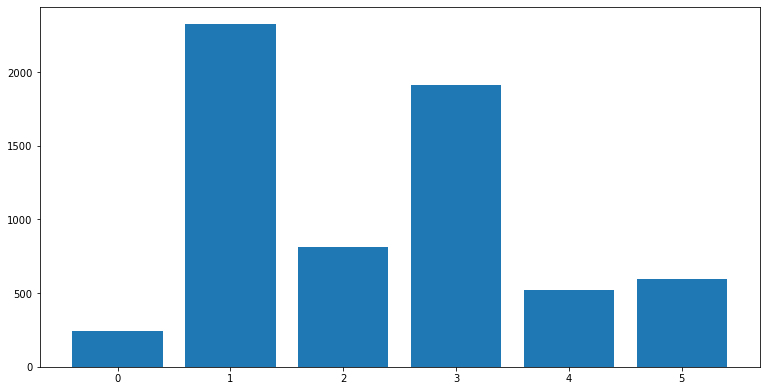

MAX: 
 tot_amm_acc       5.0
appearances    2327.0
dtype: float64 

MIN: 
 tot_amm_acc      0.0
appearances    241.0
dtype: float64 



In [71]:
plot_distribution('tot_amm_acc')

# *port_inv_val*

In [72]:
df['port_inv_val'].describe()

count    6.413000e+03
mean     4.333574e+05
std      6.968526e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.700000e+04
max      3.760000e+08
Name: port_inv_val, dtype: float64

In [73]:
df['port_inv_val'].loc[df['port_inv_val'] == 0] = 0
df['port_inv_val'].loc[(df['port_inv_val'] > 0) & (df['port_inv_val'] < 10000)] = 1
df['port_inv_val'].loc[(df['port_inv_val'] >= 10000) & (df['port_inv_val'] < 50000)] = 2
df['port_inv_val'].loc[(df['port_inv_val'] >= 50000) & (df['port_inv_val'] < 150000)] = 3
df['port_inv_val'].loc[(df['port_inv_val'] >= 150000) & (df['port_inv_val'] < 300000)] = 4
df['port_inv_val'].loc[(df['port_inv_val'] >= 300000) & (df['port_inv_val'] < 500000)] = 5
df['port_inv_val'].loc[df['port_inv_val'] >= 500000] = 6

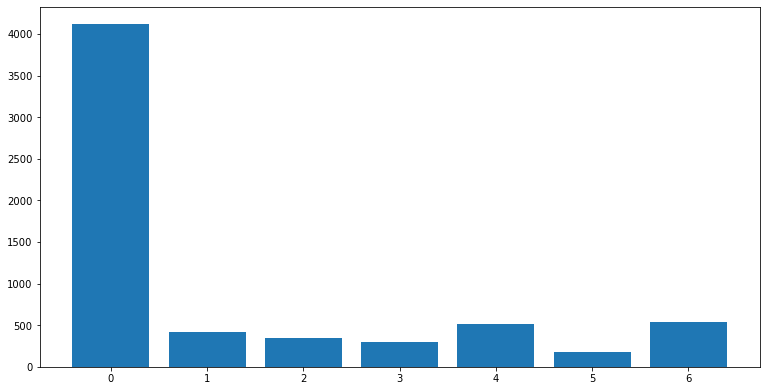

MAX: 
 port_inv_val       6.0
appearances     4120.0
dtype: float64 

MIN: 
 port_inv_val      0.0
appearances     179.0
dtype: float64 



In [74]:
plot_distribution('port_inv_val')

# *ann_inv_income*

In [75]:
df['ann_inv_income'].describe()

count    6.413000e+03
mean     9.034366e+03
std      2.222844e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.260000e+07
Name: ann_inv_income, dtype: float64

In [76]:
df['ann_inv_income'].loc[df['ann_inv_income'] == 0] = 0
df['ann_inv_income'].loc[(df['ann_inv_income'] > 0) & (df['ann_inv_income'] < 10000)] = 1
df['ann_inv_income'].loc[(df['ann_inv_income'] >= 10000) & (df['ann_inv_income'] < 50000)] = 2
df['ann_inv_income'].loc[df['ann_inv_income'] >= 50000] = 3

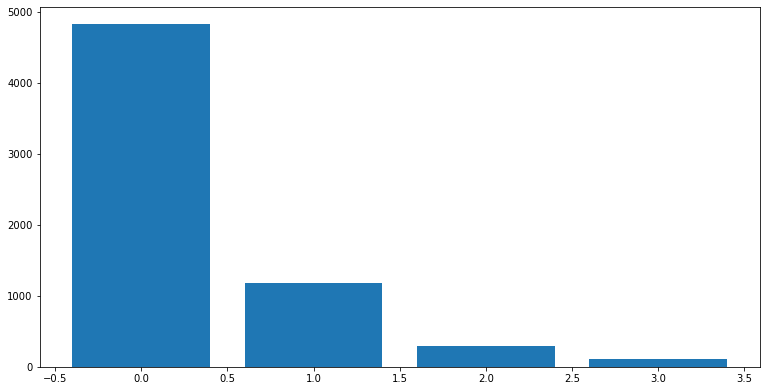

MAX: 
 ann_inv_income       3.0
appearances       4832.0
dtype: float64 

MIN: 
 ann_inv_income      0.0
appearances       113.0
dtype: float64 



In [77]:
plot_distribution('ann_inv_income')

# *monthly_expenses*

In [78]:
df['monthly_expenses'].describe()

count     6413.000000
mean      1851.200073
std       1937.142293
min         64.000000
25%        900.000000
50%       1360.000000
75%       2100.000000
max      36442.000000
Name: monthly_expenses, dtype: float64

In [79]:
df['monthly_expenses'].loc[df['monthly_expenses'] <= 500] = 1
df['monthly_expenses'].loc[(df['monthly_expenses'] > 500) & (df['monthly_expenses'] < 1000)] = 2
df['monthly_expenses'].loc[(df['monthly_expenses'] >= 1000) & (df['monthly_expenses'] < 2000)] = 3
df['monthly_expenses'].loc[(df['monthly_expenses'] >= 2000) & (df['monthly_expenses'] < 3000)] = 4
df['monthly_expenses'].loc[(df['monthly_expenses'] >= 3000) & (df['monthly_expenses'] < 4000)] = 5
df['monthly_expenses'].loc[df['monthly_expenses'] >= 4000] = 6

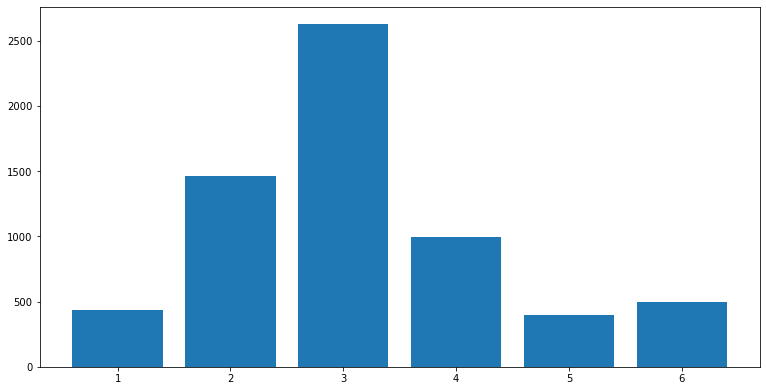

MAX: 
 monthly_expenses       6.0
appearances         2630.0
dtype: float64 

MIN: 
 monthly_expenses      1.0
appearances         394.0
dtype: float64 



In [80]:
plot_distribution('monthly_expenses')

In [81]:
df.describe()

,age,married,education,value_main_house,future_expenses,%_spend_future_win,risk,tot_amm_year_retirement_plans,tot_value_retirement_plans,tot_income_month,tot_loans_rest,tot_amm_acc,port_inv_val,ann_inv_income,monthly_expenses
count,6413.000000,6413.000000,6413.000000,6413.000000,6413.000000,6413.000000,6413.000000,6413.000000,6413.000000,6413.000000,6413.000000,6413.000000,6413.000000,6413.000000,6413.000000
mean,5.002807,2.606424,6.689069,3.018088,2.110245,3.056760,3.717449,1.228598,2.991424,3.036177,0.687354,2.302043,1.279588,0.327148,3.147825
std,1.465019,1.561917,3.680257,1.922058,0.932957,1.647288,0.554854,1.066041,0.860744,2.033009,1.051107,1.372346,2.021242,0.645494,1.256416
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4.000000,2.000000,3.000000,2.000000,1.000000,1.000000,4.000000,1.000000,3.000000,2.000000,0.000000,1.000000,0.000000,0.000000,2.000000
50%,5.000000,2.000000,6.000000,3.000000,2.000000,4.000000,4.000000,1.000000,3.000000,3.000000,0.000000,2.000000,0.000000,0.000000,3.000000
75%,6.000000,2.000000,11.000000,5.000000,3.000000,5.000000,4.000000,1.000000,3.000000,5.000000,1.000000,3.000000,2.000000,0.000000,4.000000
max,7.000000,6.000000,14.000000,6.000000,3.000000,5.000000,4.000000,5.000000,6.000000,6.000000,4.000000,5.000000,6.000000,3.000000,6.000000


In [82]:
os.makedirs('final_dataset', exist_ok=True)  
df.to_csv('final_dataset/df_2017_cat.csv', index = False) 